Stroke Prediction with Logistic Regression

In [38]:
# import lines
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as plt
# Read in csv
df = pd.read_csv("stroke_dataset.csv")
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [33]:
categorical_columns = list(df.select_dtypes(include=['object']).columns)
for column in categorical_columns:
    print("{}:".format(column), df[column].unique())
# all categorical columns dont have too many categories, thus no need for grouping


gender: ['Male' 'Female' 'Other']
ever_married: ['Yes' 'No']
work_type: ['Private' 'Self-employed' 'Govt_job' 'children' 'Never_worked']
Residence_type: ['Urban' 'Rural']
smoking_status: ['formerly smoked' 'never smoked' 'smokes' 'Unknown']


Data Exploration

In [41]:
df["stroke"].value_counts()

0    4861
1     249
Name: stroke, dtype: int64

<AxesSubplot: xlabel='stroke', ylabel='count'>

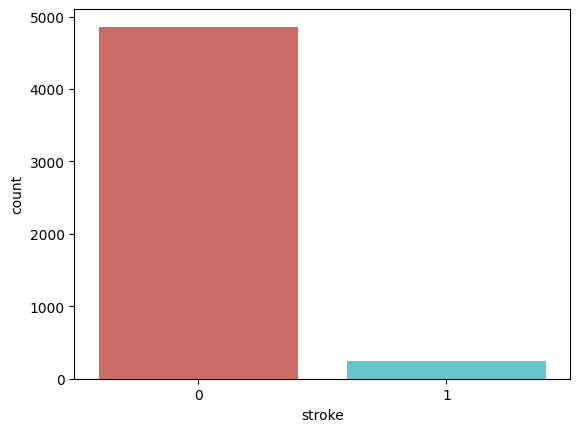

In [42]:
sns.countplot(x = "stroke", data = df, palette="hls")
# classes are wildly imbalanced, no stroke:stroke is large
# first do more exploration

In [43]:
# get categorical means for target
df.groupby("stroke").mean()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi
stroke,,,,,,
0,36487.236371,41.971545,0.088871,0.047110,104.795513,28.823064
1,37115.068273,67.728193,0.265060,0.188755,132.544739,30.471292


In [45]:
''' 
Observations:
Average age of people who got a stroke is higher than average age of people who did not get a stroke -> could be good predictor
People who got strokes were more likely to have hypertension than that of people who did not get strokes ---> could be good predictor
People who got strokes were also more likely to have heart disease than that of people who did not get strokes--> could be good predictor
avg glucose level of stroke patients higher than that of healthy people --> could be good predictor
bmi is only slightly higher for stroke patients --> likely ambiguous

'''

' \nObservations:\nAverage age of people who got a stroke is higher than average age of people who did not get a stroke -> could be good predictor\nPeople who got strokes were more likely to have hypertension than that of people who did not get strokes ---> could be good predictor\nPeople who got strokes were also more likely to have heart disease than that of people who did not get strokes--> could be good predictor\navg glucose level of stroke patients higher than that of healthy people --> could be good predictor\nbmi is only slightly higher for stroke patients --> likely ambiguous\n\n'

In [46]:
# now get categorical means for all other categorical variables
categorical_columns

['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']